In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import utils
import funcs
import eda_plots
import new_mlfuncs

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# import train data
train_filepath = 'data/df_merged.csv'
train_df, train_df_nulls = funcs.read_and_qa(train_filepath)

There are 41 columns and 59400 records in the dataframe.
Extracting count and percentages of nulls and non nulls


In [4]:
# import test data
test_filepath = 'data/test_values.csv'
test_df, test_df_nulls = funcs.read_and_qa(test_filepath)

There are 40 columns and 14850 records in the dataframe.
Extracting count and percentages of nulls and non nulls


In [5]:
# initial columns to drop
initial_to_drop = ['id', 'date_recorded', 'num_private', 'region', 'region_code', 'recorded_by', 'extraction_type_group', 'extraction_type_class',\
                  'quantity_group', 'source_type', 'waterpoint_type_group', 'permit', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward',\
                  'management_group', 'payment']
target_var = 'status_group'
num_cols = []
feats_to_exclude = []

In [6]:
train_red_df = new_mlfuncs.pre_ml_preprocessing(train_df, initial_to_drop, num_cols, target_var = 'status_group', missing_val_threshold = 40, num_cols_threshold = 0.9, low_var_threshold = 0.9)

Dropping: id
Dropping: date_recorded
Dropping: num_private
Dropping: region
Dropping: region_code
Dropping: recorded_by
Dropping: extraction_type_group
Dropping: extraction_type_class
Dropping: quantity_group
Dropping: source_type
Dropping: waterpoint_type_group
Dropping: permit
Dropping: funder
Dropping: installer
Dropping: wpt_name
Dropping: subvillage
Dropping: lga
Dropping: ward
Dropping: management_group
Dropping: payment
Dropping scheme_name due to missing values count above threshold: 0.4
There are no high correlated features. No column will be dropped!
Dropping low variance feature: public_meeting


In [7]:
test_red_df = new_mlfuncs.pre_ml_preprocessing(test_df, initial_to_drop, num_cols, target_var = None, missing_val_threshold = 40, num_cols_threshold = 0.9, low_var_threshold = 0.9)

Dropping: id
Dropping: date_recorded
Dropping: num_private
Dropping: region
Dropping: region_code
Dropping: recorded_by
Dropping: extraction_type_group
Dropping: extraction_type_class
Dropping: quantity_group
Dropping: source_type
Dropping: waterpoint_type_group
Dropping: permit
Dropping: funder
Dropping: installer
Dropping: wpt_name
Dropping: subvillage
Dropping: lga
Dropping: ward
Dropping: management_group
Dropping: payment
Dropping scheme_name due to missing values count above threshold: 0.4
There are no high correlated features. No column will be dropped!
Dropping low variance feature: public_meeting


In [8]:
train, test, le = new_mlfuncs.target_encode_categorical_features(train_red_df, test_red_df, target=target_var, alpha=5)

In [9]:
target_var = 'target_encoded'

Creating pipeline for RandomForestClassifier.
Fitting training data to pipeline for RandomForestClassifier.
Predicting test values for RandomForestClassifier.
Calculating accuracy score for RandomForestClassifier.
Accuracy Score for RandomForestClassifier: 0.7900007204091924
####################################################################################
RandomForestClassifier model yielded the highest Accuracy Score of: 0.79


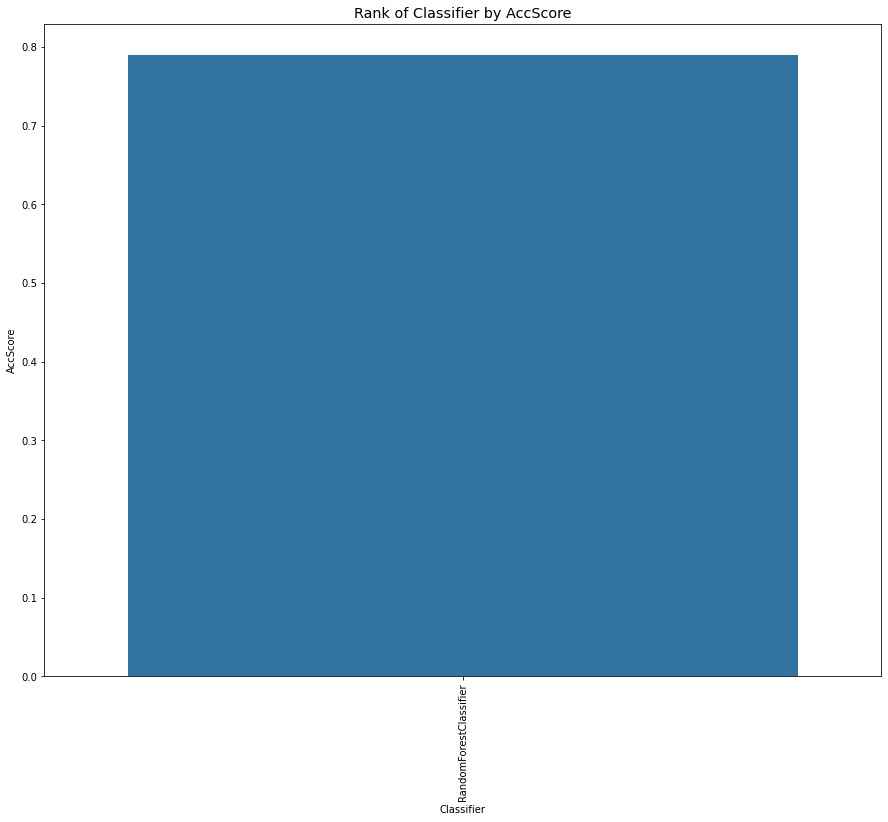

####################################################################################


In [10]:
best_classifier_acc_score, pipe, final_predictors = new_mlfuncs.multi_models_classifiers(train, target_var,  feats_to_exclude, stratify = True, test_size = 0.25, classifier_type = 'multi_class', text_feats = None)

In [12]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                 

In [11]:
GridSearchCV_model_output = new_mlfuncs.best_classifier_hyperparameter(train, best_classifier_acc_score, target_var, feats_to_exclude, stratify = True, test_size = 0.25, classifier_type = 'multi_class', text_feats = None)

hyperparameter tuning for the Best Classifier: RandomForestClassifier
Creating pipeline for RandomForestClassifier.
Best parameters after GridSearchCV:
 {'randomforestclassifier__max_depth': 90, 'randomforestclassifier__n_estimators': 3000}
Best score after GridSearchCV:
 0.78


KeyError: 'labelencoder'